In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from torch.utils.data import Dataset, DataLoader
import random
random.seed(42)


In [2]:
df = pd.read_csv(
    "https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv")
df.shape


(32, 12)

In [3]:
X = torch.tensor(df.wt.values, dtype=torch.float32)
y = torch.tensor(df.mpg.values, dtype=torch.float32)
x_np = np.array(X)
y_np = np.array(y)
X = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)
X, y, x_np, y_np


(tensor([2.6200, 2.8750, 2.3200, 3.2150, 3.4400, 3.4600, 3.5700, 3.1900, 3.1500,
         3.4400, 3.4400, 4.0700, 3.7300, 3.7800, 5.2500, 5.4240, 5.3450, 2.2000,
         1.6150, 1.8350, 2.4650, 3.5200, 3.4350, 3.8400, 3.8450, 1.9350, 2.1400,
         1.5130, 3.1700, 2.7700, 3.5700, 2.7800]),
 tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000, 18.1000, 14.3000, 24.4000,
         22.8000, 19.2000, 17.8000, 16.4000, 17.3000, 15.2000, 10.4000, 10.4000,
         14.7000, 32.4000, 30.4000, 33.9000, 21.5000, 15.5000, 15.2000, 13.3000,
         19.2000, 27.3000, 26.0000, 30.4000, 15.8000, 19.7000, 15.0000, 21.4000]),
 array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
        3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
        1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
        1.513, 3.17 , 2.77 , 3.57 , 2.78 ], dtype=float32),
 array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 1

In [4]:
# Dataset and Dataloader

class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


train_loader = DataLoader(LinearRegressionDataset(x_np.reshape(-1,1), y_np.reshape(-1,1)), batch_size=2)


<AxesSubplot:>

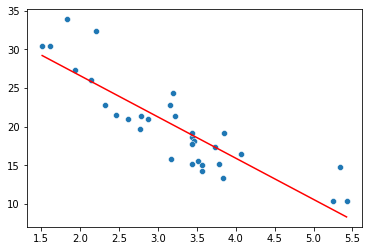

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_np.reshape(-1, 1), y_np.reshape(-1, 1))
# sns.regplot(data=df)
y_sk = regressor.coef_[0]*x_np + regressor.intercept_
sns.scatterplot(x=x_np, y=y_np)
sns.lineplot(x=x_np, y=y_sk, color="red")


In [6]:
class LinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, X):
        pred = self.linear(X)
        return pred


In [7]:
# Check trainer loader
for pos, (xi, yi) in enumerate(train_loader):
    print(str(pos) + "th batch")
    print(xi, yi)
    # break


0th batch
tensor([[2.6200],
        [2.8750]]) tensor([[21.],
        [21.]])
1th batch
tensor([[2.3200],
        [3.2150]]) tensor([[22.8000],
        [21.4000]])
2th batch
tensor([[3.4400],
        [3.4600]]) tensor([[18.7000],
        [18.1000]])
3th batch
tensor([[3.5700],
        [3.1900]]) tensor([[14.3000],
        [24.4000]])
4th batch
tensor([[3.1500],
        [3.4400]]) tensor([[22.8000],
        [19.2000]])
5th batch
tensor([[3.4400],
        [4.0700]]) tensor([[17.8000],
        [16.4000]])
6th batch
tensor([[3.7300],
        [3.7800]]) tensor([[17.3000],
        [15.2000]])
7th batch
tensor([[5.2500],
        [5.4240]]) tensor([[10.4000],
        [10.4000]])
8th batch
tensor([[5.3450],
        [2.2000]]) tensor([[14.7000],
        [32.4000]])
9th batch
tensor([[1.6150],
        [1.8350]]) tensor([[30.4000],
        [33.9000]])
10th batch
tensor([[2.4650],
        [3.5200]]) tensor([[21.5000],
        [15.5000]])
11th batch
tensor([[3.4350],
        [3.8400]]) tensor([[15.2

In [8]:
# # Manually Apply Batch Size
# model = LinearReg()
# lr = 0.005
# epochs = 1000

# loss_func = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(),lr=lr)

# losses = []
# slopes =[]
# biases=[]
# batch_size = 2

# for epoch in range(epochs):
#     for i in range(0, X.reshape(-1,1).shape[0], batch_size):
#         optimizer.zero_grad()

#         #fwd pass
#         pred = model(X.reshape(-1,1)[i:i+batch_size])

#         # loss
#         loss = loss_func(pred,y[i:i+batch_size])
#         loss.backward()
#         #bwd pass
#         optimizer.step()

#         losses.append(loss.item())
#         for name, params in model.named_parameters():
#             if params.requires_grad:
#                 if name == "linear.weight":
#                     slopes.append(params.data.numpy()[0][0])
#                 if name == "linear.bias":
#                     biases.append(params.data.numpy()[0])

#     if((epoch+1)%100==0):
#         print(f"Epoch:{epoch+1}, Loss:{loss}")


In [9]:
X

tensor([2.6200, 2.8750, 2.3200, 3.2150, 3.4400, 3.4600, 3.5700, 3.1900, 3.1500,
        3.4400, 3.4400, 4.0700, 3.7300, 3.7800, 5.2500, 5.4240, 5.3450, 2.2000,
        1.6150, 1.8350, 2.4650, 3.5200, 3.4350, 3.8400, 3.8450, 1.9350, 2.1400,
        1.5130, 3.1700, 2.7700, 3.5700, 2.7800])

In [10]:
# Batch Training with train loader
model = LinearReg()
lr = 0.02
epochs = 1000

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

losses = []
slopes = []
biases = []

for epoch in range(epochs):
    for i, (xi, yi) in enumerate(train_loader):

        # CLear the gradients to prevent accumulation of grads
        # For each forward and backward pass, gradients need to be cleared
        optimizer.zero_grad()

        # fwd pass
        pred = model(xi)

        # loss
        loss = loss_func(pred, yi)
        losses.append(loss.item())

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()

        for name, params in model.named_parameters():
            if params.requires_grad:
                if name == "linear.weight":
                    slopes.append(params.data.numpy()[0][0])
                if name == "linear.bias":
                    biases.append(params.data.numpy()[0])

    if ((epoch+1) % 100 == 0):
        print(f"Epoch:{epoch+1}, Loss:{loss}")


Epoch:100, Loss:1.5791229009628296
Epoch:200, Loss:1.4116747379302979
Epoch:300, Loss:1.4094361066818237
Epoch:400, Loss:1.409427285194397
Epoch:500, Loss:1.409427285194397
Epoch:600, Loss:1.409427285194397
Epoch:700, Loss:1.409427285194397
Epoch:800, Loss:1.409427285194397
Epoch:900, Loss:1.409427285194397
Epoch:1000, Loss:1.409427285194397


<AxesSubplot:>

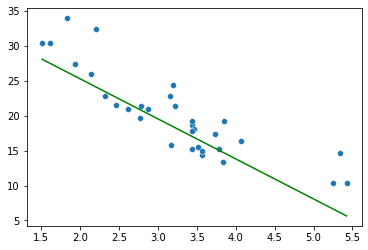

In [11]:
y_pred = slopes[-1]*x_np + biases[-1]
sns.lineplot(x=x_np, y=y_pred, color="green")
sns.scatterplot(x=x_np, y=y_np)


In [17]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

LinearReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


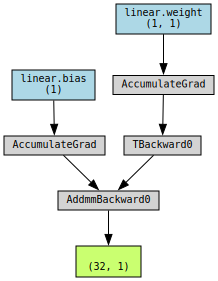

In [21]:
# Display Model Architecture
print(model)
from torchviz import make_dot
make_dot(model(torch.from_numpy(x_np.reshape(-1,1))), params=dict(model.named_parameters()))

In [24]:
# Save Model
torch.save(model.state_dict(),"./LinRegBatch.pth")

# NOTE:
# Why save only the State Dict and not the entire Model?
# The entire model stores the dataset paths as well, which will change from system to system. 
# Hence when training on different sys, it may cause a problem
# State_dict has only learnable parameters and registered buffers(batch norm)

In [25]:
# Load Model
model = LinearReg()
model.load_state_dict(torch.load("LinRegBatch.pth")) # pth can also be used as an extension; pth(pytorch)
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])